# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

In [ ]:
# Part 1-2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact

plt.style.use('ggplot')
%matplotlib inline

# Part 3-4
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

# Part 5
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

# Part 6
import scipy.stats as stats
from sklearn.metrics import roc_curve, roc_auc_score
from google.colab import drive
!pip install shap
import shap
!pip install catboost
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Таблица

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [ ]:
# Читаем данные

X_train = pd.read_csv("https://raw.githubusercontent.com/ml-dafe/ml_mipt_dafe/main/homeworks/hw_1/train_features_with_answers.csv")

In [ ]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ. 

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграммы;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки. 

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

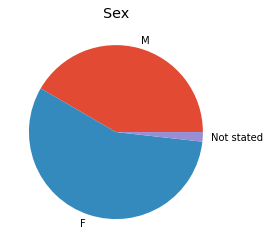

In [ ]:
# Да 😎
# Круговая диаграмма
values = [int(X_train[X_train['sex'] == 'M'].shape[0]), int(X_train[X_train['sex'] == 'F'].shape[0]), int(X_train.shape[0] - (X_train[X_train['sex'] == 'F'].shape[0] + X_train[X_train['sex'] == 'M'].shape[0]))]
plt.pie(values, labels = ['M', 'F', 'Not stated'])
plt.title("Sex")
plt.show()

## Характеристика: "Age"

Not stated:  36


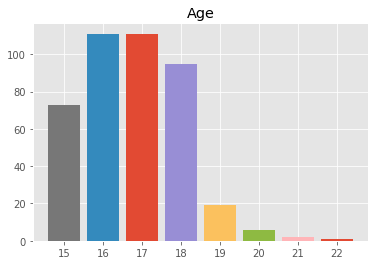

In [ ]:
# Гистограмма
indexes = X_train['age'].value_counts().index.tolist() # Значения, которые принимает age
sum = 0
for i in indexes:
  if (i >= 15) and (i <= 22):                          # Значения с сайта
    plt.bar(i, X_train['age'].value_counts()[i])
    sum += X_train['age'].value_counts()[i]
print('Not stated: ', X_train.shape[0] - sum)
plt.title("Age")
plt.show()

## Характеристика: "Weekly study time"

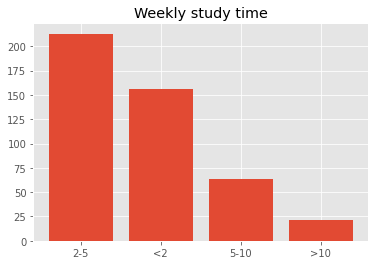

In [ ]:
# Гистограмма
# 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours
indexes = list()
for i in X_train['studytime'].value_counts().index.tolist():
  if i == 1:
    indexes.append('<2')
  if i == 2:
    indexes.append('2-5')
  if i == 3:
    indexes.append('5-10')
  if i == 4:
    indexes.append('>10')
plt.bar(indexes, X_train['studytime'].value_counts().values.tolist())
plt.title("Weekly study time")
plt.show()

## Характеристика: "Romantic Relationship"

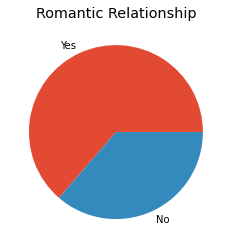

In [ ]:
# Круговая диаграмма
values = [X_train['romantic'].value_counts().values.tolist()[0], X_train['romantic'].value_counts().values.tolist()[1]]
plt.pie(values, labels = ['Yes', 'No'])
plt.title("Romantic Relationship")
plt.show()

## Характеристика: "Alcohol Consumption"

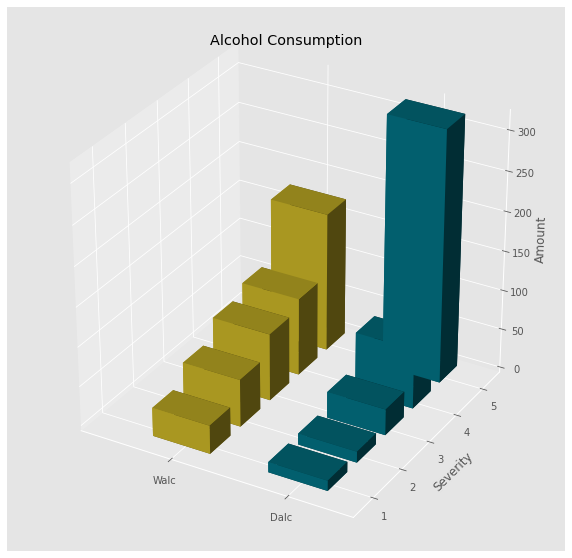

In [ ]:
# 3D диаграмма
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

x_labels = ['Walc', ' ', 'Dalc']
y_labels = ['1', '2', '3', '4', '5']
# X_train сортировать не надо
data = np.array([
    X_train['Walc'].value_counts().values.tolist(),
    X_train['Dalc'].value_counts().values.tolist()
])

numOfCols = 2
numOfRows = 5

x = np.array([1, 3])
# y = np.arange(0, numOfRows, 1)
y = np.arange(numOfRows, 0, -1)
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten() * 1.5
z = np.zeros(numOfCols * numOfRows)

dx = np.ones(numOfRows * numOfCols)
dy = np.ones(numOfCols * numOfRows)
dz = data.flatten('F')

color_values = list()
for i in range(5):
  color_values.append([191. / 255., 171. / 255., 37. / 255., 1.])
  color_values.append([2. / 255., 108. / 255., 124. / 255., 1.])
 
ax.bar3d(x, y, z, dx, dy, dz, color = color_values, shade = True)
ax.invert_yaxis()

ax.set_ylabel('Severity')
ax.set_zlabel('Amount')

plt.xlim(0, 4.5)
plt.xticks([1.5, 3.5], ['Walc', 'Dalc'])
plt.yticks(np.arange(2, 8.5, step = 1.5), ['1', '2', '3', '4', '5'])
plt.title("Alcohol Consumption")
plt.show()

## Целевая зависимость: "G3" (Final Grade)

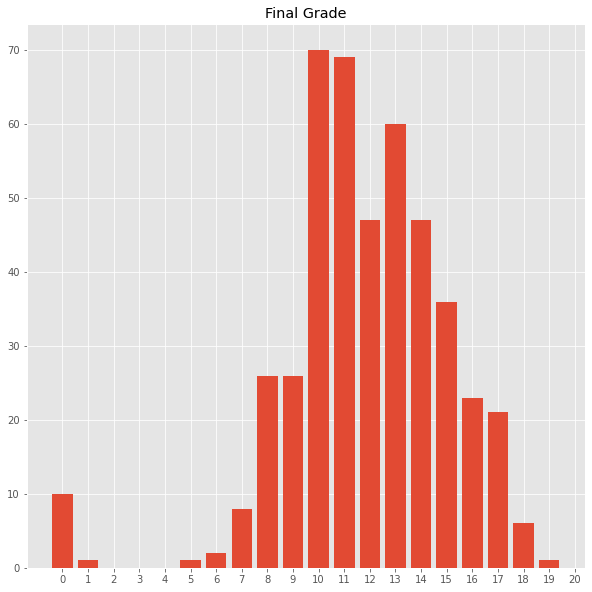

In [ ]:
# Гистограмма
fig = plt.figure(figsize = (10, 10))
indexes = X_train.value_counts('G3').index.tolist()
values = X_train.value_counts('G3').values.tolist()

height = [x for _, x in sorted(zip(indexes, values))]
bar_indexes = sorted(indexes)

plt.bar(bar_indexes, height)
plt.xticks(np.arange(0, 21, step = 1))
plt.title("Final Grade")
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

## Характеристика: "Family support"

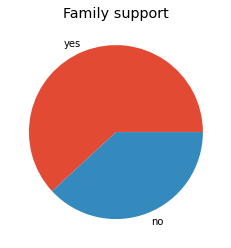

In [ ]:
# Круговая диаграмма (O_о pieplot)
values = [X_train['famsup'].value_counts().values.tolist()[0], X_train['famsup'].value_counts().values.tolist()[1]]
plt.pie(values, labels = ['yes', 'no'])
plt.title("Family support")
plt.show()

## Характеристика: "Parents marriage status" and "Number of school absences"

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


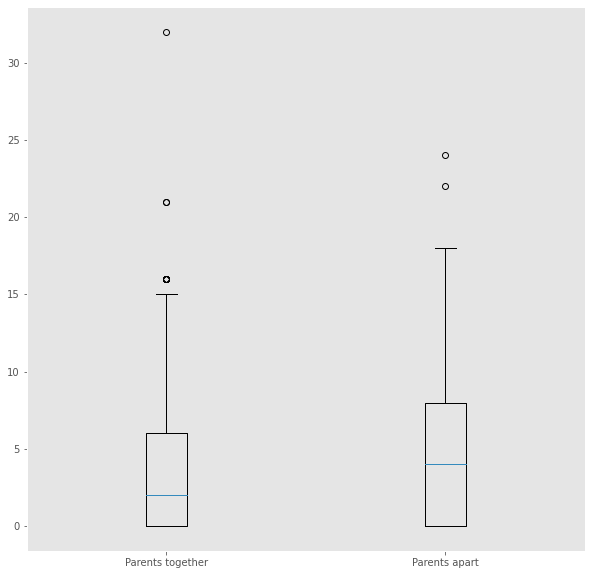

In [ ]:
# Boxplot
X_train.value_counts('Pstatus')
X_train.value_counts('absences')

filter_T = X_train['Pstatus'] == 'T'
X_train[filter_T].value_counts('absences')

filter_A = X_train['Pstatus'] == 'A'
X_train[filter_A].value_counts('absences')

fig = plt.figure(figsize = (10, 10))
plt.boxplot([X_train[filter_T]['absences'], X_train[filter_A]['absences']])
plt.xticks([1, 2], ['Parents together', 'Parents apart'])
plt.grid()
plt.show()

## Характеристика: "Student's school" and "Number of school absences"

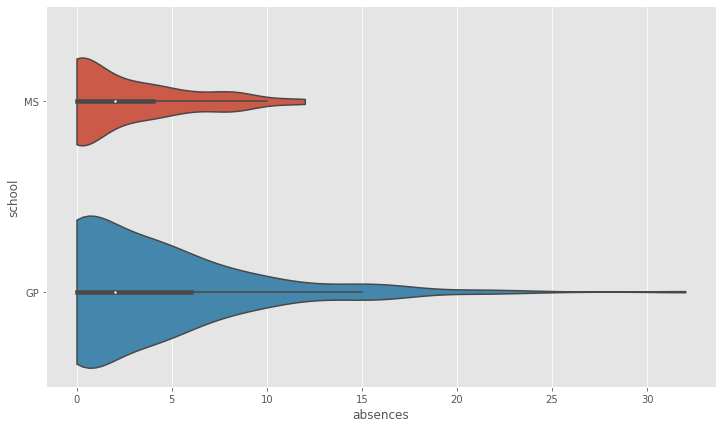

In [ ]:
# Violinplot
fig = plt.figure(figsize = (12, 7))
sns.violinplot(data = X_train, x = 'absences', y = 'school', scale = 'count', cut = 0)

## Характеристика: "Wants to take higher education" and "Number of school absences"

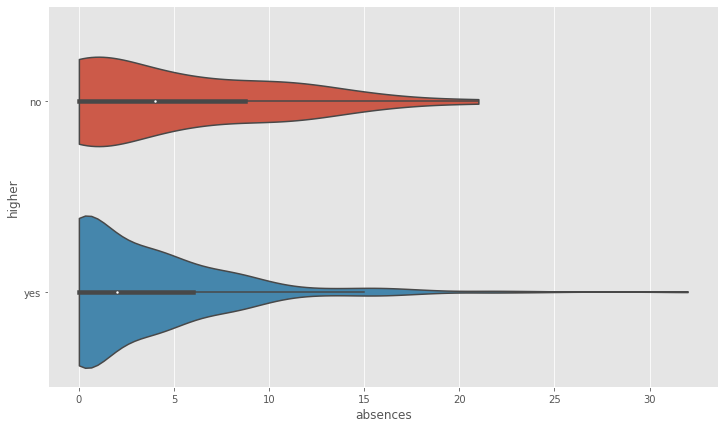

In [ ]:
# Violinplot
fig = plt.figure(figsize = (12, 7))
sns.violinplot(data = X_train, x = 'absences', y = 'higher', scale = 'area', cut = 0)

## Характеристика: "Guardian" and "Number of school absences"

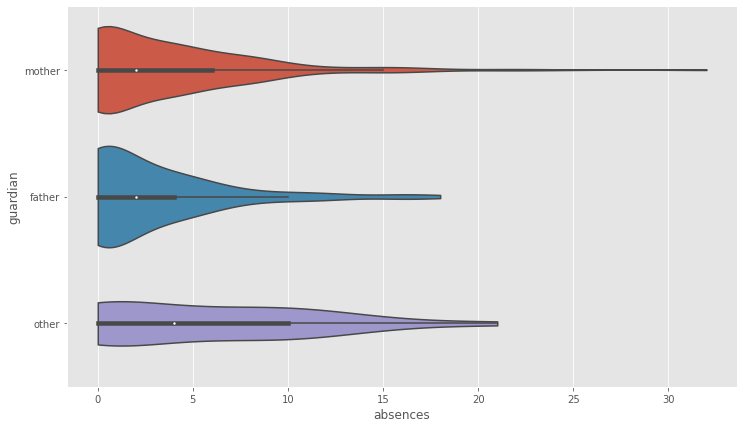

In [ ]:
# Violinplot
fig = plt.figure(figsize = (12, 7))
sns.violinplot(data = X_train, x = 'absences', y = 'guardian', cut = 0)

## Характеристика: "Home to school traveltime" and "Number of school absences"

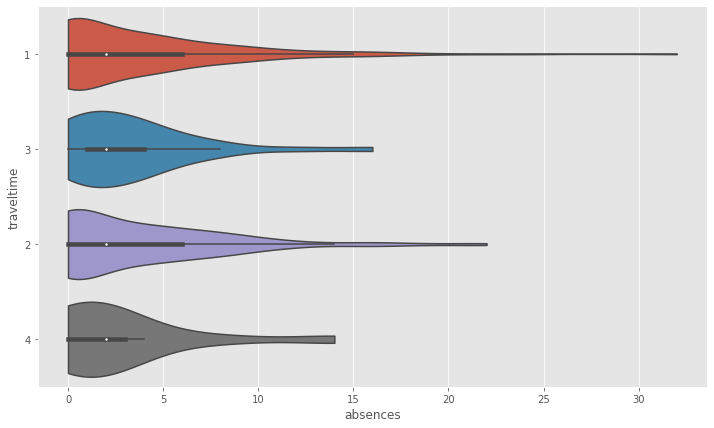

In [ ]:
# Violinplot
df_traveltime = X_train.copy()
df_traveltime['traveltime'] = df_traveltime['traveltime'].astype(str)

fig = plt.figure(figsize = (12, 7))
sns.violinplot(data = df_traveltime, x = 'absences', y = 'traveltime', cut = 0)

## Характеристика: "Age" and "Romantic Relationship"

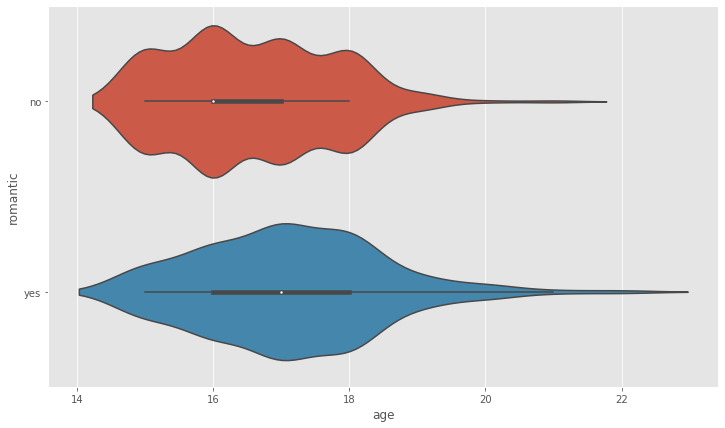

In [ ]:
# Violinplot
df_age = X_train.drop(X_train[(X_train['age'] > 22) | (X_train['age'] < 15) | (pd.isna(X_train['age']))].index)

fig = plt.figure(figsize = (12, 7))
sns.violinplot(data = df_age, x = 'age', y = 'romantic')

## Характеристика: "Sex" and "G3"

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


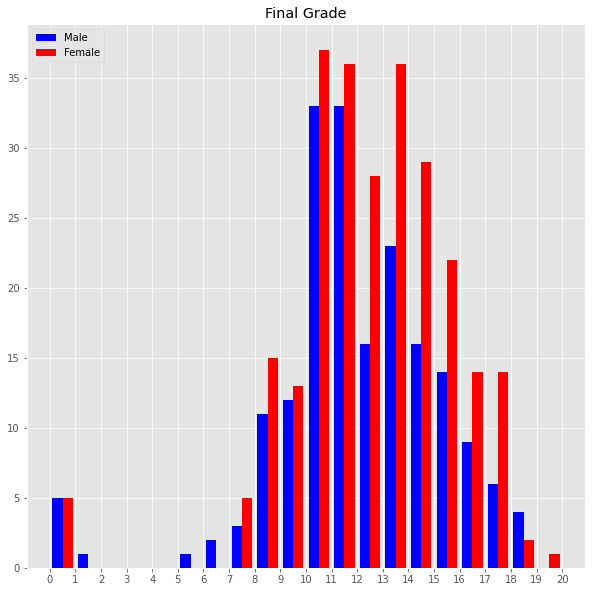

80th percentile for male students:  14.0
80th percentile for female students:  15.0
80th percentile for all students (including not correctly stated):  14.0


In [ ]:
# Гистограмма
fig = plt.figure(figsize = (10, 10))

# indexes_M = X_train[X_train['sex'] == 'M'].value_counts('G3').index.tolist()
# values_M = X_train[X_train['sex'] == 'M'].value_counts('G3').values.tolist()
# height_M = [x for _, x in sorted(zip(indexes_M, values_M))]
# bar_indexes_M = sorted(indexes_M)

df_M = X_train[X_train['sex'] == 'M']['G3']
df_F = X_train[X_train['sex'] == 'F']['G3']

bins = np.linspace(0, 20, 21)

plt.hist([df_M, df_F], bins, label = ['Male', 'Female'], color = ['blue', 'red'])
plt.xticks(bins)
plt.title("Final Grade")
plt.legend(loc = 'upper left')
plt.show()
print('80th percentile for male students: ', df_M.quantile(0.8))
print('80th percentile for female students: ', df_F.quantile(0.8))
print('80th percentile for all students (including not correctly stated): ', X_train['G3'].quantile(0.8))

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [ ]:
corrM = X_train.corr()
corrM

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,0.017118,0.015926,-0.045215,0.037509,-0.000269,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602,-0.031453
Medu,0.017118,1.000000,0.650052,-0.292153,0.088940,-0.172137,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881,0.207645
Fedu,0.015926,0.650052,1.000000,-0.211014,0.077986,-0.157411,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975,0.196666
traveltime,-0.045215,-0.292153,-0.211014,1.000000,-0.084222,0.079322,-0.025235,0.003360,0.008395,0.078637,0.048305,-0.047959,-0.041817,-0.150548
studytime,0.037509,0.088940,0.077986,-0.084222,1.000000,-0.125199,-0.024362,-0.075368,-0.098676,-0.152659,-0.243818,-0.052498,-0.099545,0.217938
failures,-0.000269,-0.172137,-0.157411,0.079322,-0.125199,1.000000,-0.064462,0.112960,0.052652,0.153152,0.135870,0.045039,0.121685,-0.407549
famrel,0.050729,0.068827,0.086715,-0.025235,-0.024362,-0.064462,1.000000,0.113157,0.070991,-0.052349,-0.075185,0.111193,-0.117433,0.087383
freetime,-0.048159,0.029327,0.032968,0.003360,-0.075368,0.112960,0.113157,1.000000,0.359857,0.110431,0.166500,0.109172,-0.000584,-0.093619
goout,-0.019423,0.055263,0.062423,0.008395,-0.098676,0.052652,0.070991,0.359857,1.000000,0.241739,0.421281,-0.008693,0.059189,-0.090558
Dalc,-0.033190,-0.011133,-0.002507,0.078637,-0.152659,0.153152,-0.052349,0.110431,0.241739,1.000000,0.613398,0.063682,0.217312,-0.233310


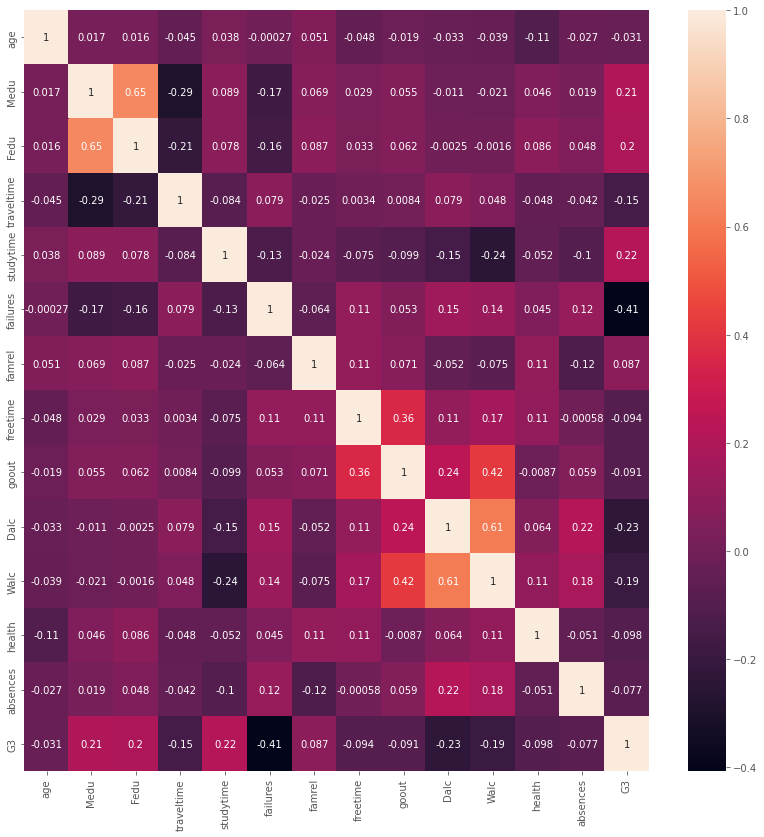

In [ ]:
fig = plt.figure(figsize = (14, 14))
sns.heatmap(corrM, annot = True)

### Матрица корреляции для "Age" и "Romantic Relationship" (Categorical features) 

In [ ]:
df_age.loc[df_age['romantic'] == 'yes', 'romantic'] = 1
df_age.loc[df_age['romantic'] == 'no', 'romantic'] = 0

correlation_matrix = np.corrcoef([df_age['romantic'].values.tolist(), df_age['age'].values.tolist()])
print(correlation_matrix)

[[1.         0.20501112]
 [0.20501112 1.        ]]


## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

In [ ]:
corrM_Spearman = X_train.corr(method = 'spearman')
corrM_Spearman

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.104496,-0.104103,0.045757,0.014443,0.313380,0.004334,0.024655,0.173288,0.106105,0.109842,-0.060254,0.153987,-0.120943
Medu,-0.104496,1.000000,0.649158,-0.292184,0.090921,-0.208397,0.065322,0.016949,0.053074,-0.004821,-0.024095,0.055713,0.024186,0.254410
Fedu,-0.104103,0.649158,1.000000,-0.218918,0.090104,-0.170617,0.069760,0.019026,0.059686,-0.001089,-0.011015,0.088271,0.059623,0.222376
traveltime,0.045757,-0.292184,-0.218918,1.000000,-0.117844,0.108612,-0.052389,0.007695,-0.002830,0.049697,0.028116,-0.074656,-0.002857,-0.163508
studytime,0.014443,0.090921,0.090104,-0.117844,1.000000,-0.126567,0.004516,-0.086508,-0.109090,-0.180305,-0.249431,-0.080128,-0.114375,0.259593
failures,0.313380,-0.208397,-0.170617,0.108612,-0.126567,1.000000,-0.060283,0.108229,0.037942,0.131170,0.101222,0.043899,0.113347,-0.464614
famrel,0.004334,0.065322,0.069760,-0.052389,0.004516,-0.060283,1.000000,0.117550,0.069828,-0.072194,-0.097088,0.102186,-0.133726,0.092898
freetime,0.024655,0.016949,0.019026,0.007695,-0.086508,0.108229,0.117550,1.000000,0.368421,0.147248,0.170079,0.126156,-0.020988,-0.085545
goout,0.173288,0.053074,0.059686,-0.002830,-0.109090,0.037942,0.069828,0.368421,1.000000,0.254390,0.405293,-0.001483,0.091942,-0.115120
Dalc,0.106105,-0.004821,-0.001089,0.049697,-0.180305,0.131170,-0.072194,0.147248,0.254390,1.000000,0.618808,0.085435,0.140013,-0.259769


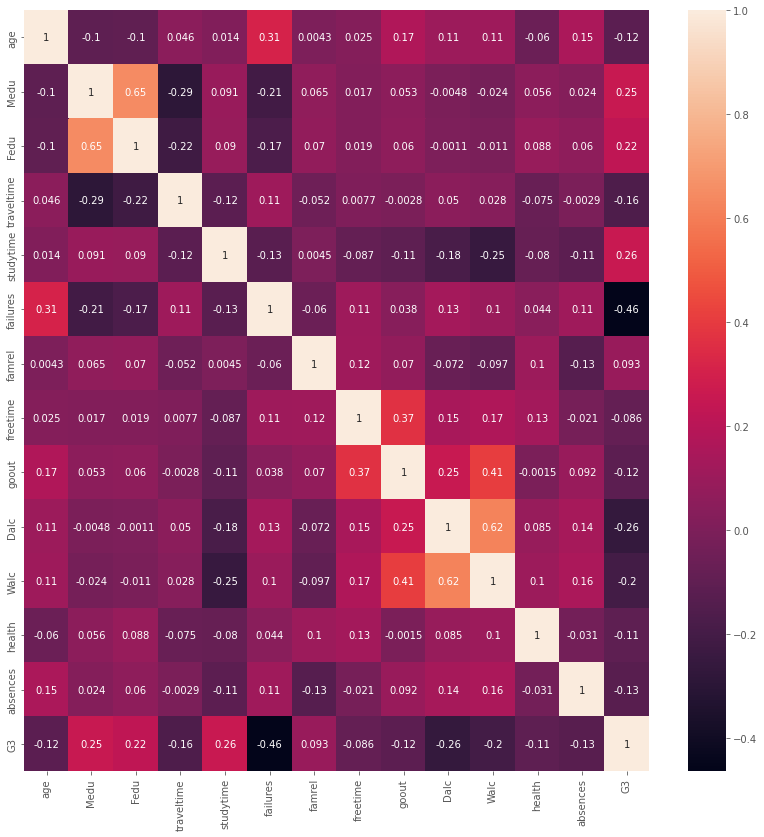

In [ ]:
fig = plt.figure(figsize = (14, 14))
sns.heatmap(corrM_Spearman, annot = True)

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [ ]:
values = {}
for i in X_train.columns:
    print(i, ": ", X_train[i].nunique())
    values.update({i : X_train[i].nunique()})
print()

print('Most unique values has', max(values, key = values.get), 'with', values[max(values, key = values.get)], 'values')
print()

index = values[min(values, key = values.get)]
for i in values:
  if values[i] == index:
    print('Least unique values has', i, 'with', values[i], 'values')
print()

mean = 0
for i in values:
  mean = mean + values[i]
mean = mean / len(values)
print('Medium is ~', round(mean))

school :  2
sex :  6
age :  16
address :  2
famsize :  2
Pstatus :  2
Medu :  5
Fedu :  5
Mjob :  5
Fjob :  5
reason :  4
guardian :  3
traveltime :  4
studytime :  4
failures :  4
schoolsup :  2
famsup :  2
paid :  2
activities :  2
nursery :  2
higher :  2
internet :  2
romantic :  2
famrel :  5
freetime :  5
goout :  5
Dalc :  5
Walc :  5
health :  5
absences :  22
G3 :  17

Most unique values has absences with 22 values

Least unique values has school with 2 values
Least unique values has address with 2 values
Least unique values has famsize with 2 values
Least unique values has Pstatus with 2 values
Least unique values has schoolsup with 2 values
Least unique values has famsup with 2 values
Least unique values has paid with 2 values
Least unique values has activities with 2 values
Least unique values has nursery with 2 values
Least unique values has higher with 2 values
Least unique values has internet with 2 values
Least unique values has romantic with 2 values

Medium is ~ 5


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

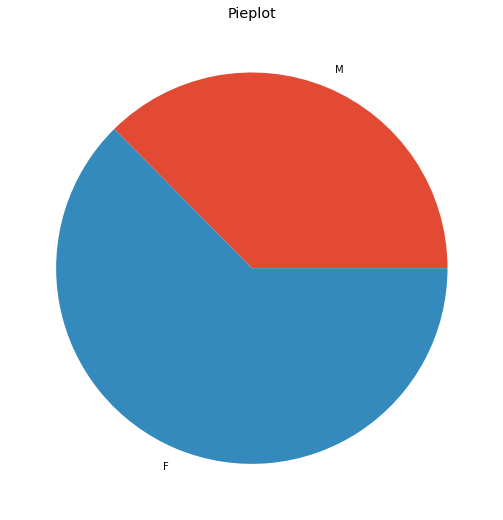

In [ ]:
# Тут уже исключены "Not stated"
fig = plt.figure(figsize = (9, 9))

values = [len(df_M[df_M >= 14]), len(df_F[df_F >= 14])] # Перцентиль мы посчитали раньше
plt.pie(values, labels = ['M', 'F'])
plt.title('Pieplot')
plt.show()

## Построить boxplot для оценок по возрасту.  

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


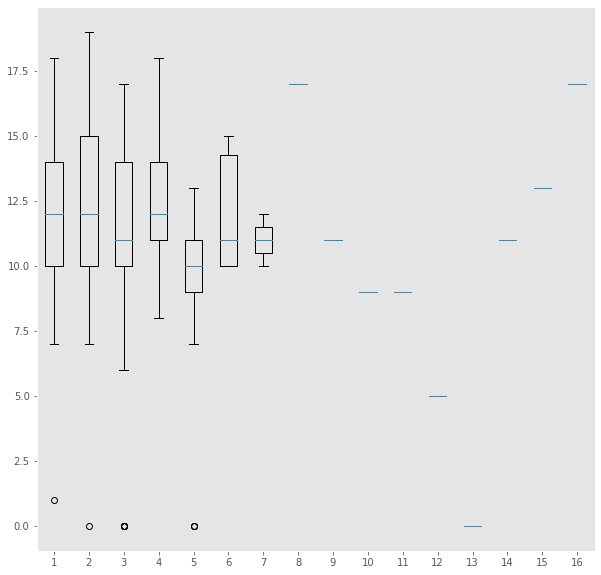

In [ ]:
# Boxplot
X_train.value_counts('age')

filter_T = X_train['Pstatus'] == 'T'
X_train[filter_T].value_counts('absences')

filter_A = X_train['Pstatus'] == 'A'
X_train[filter_A].value_counts('absences')

fig = plt.figure(figsize = (10, 10))
# plt.boxplot(X_train[filter_T]['absences'], X_train[filter_A]['absences']])
plt.boxplot([X_train[X_train['age'] == i]['G3'] for i in X_train.value_counts('age').index])
# plt.xticks(X_train.value_counts('age').index)
plt.grid()
plt.show()

## Найти id топ-5 самых юных отличников. 

In [ ]:
grades = X_train[(X_train['G3'] >= 18)]
grades = grades.sort_values(['age'])
grades.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
109,GP,M,15.0,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,18
151,MS,F,16.0,R,LE3,T,1,1,at_home,other,...,no,no,5,3,2,1,1,1,0,18
74,GP,F,17.0,R,LE3,T,3,1,services,other,...,no,no,3,1,2,1,1,3,0,19
221,GP,M,17.0,U,LE3,A,3,2,other,other,...,yes,no,4,4,4,1,2,5,10,18
294,GP,M,17.0,R,GT3,T,1,2,at_home,at_home,...,no,yes,3,5,2,2,2,1,2,18


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [ ]:
age = sorted(X_train['age'].unique())
age.pop(0)

for i in age:
  print("For age", i, ": \n    max score: ", max(X_train[X_train['age'] == i]['G3']), "\n    min score: ", min(X_train[X_train['age'] == i]['G3']))

For age -1.0 : 
    max score:  17 
    min score:  17
For age 1.0 : 
    max score:  11 
    min score:  11
For age 5.0 : 
    max score:  9 
    min score:  9
For age 8.0 : 
    max score:  9 
    min score:  9
For age 15.0 : 
    max score:  18 
    min score:  8
For age 16.0 : 
    max score:  18 
    min score:  1
For age 17.0 : 
    max score:  19 
    min score:  0
For age 18.0 : 
    max score:  17 
    min score:  0
For age 19.0 : 
    max score:  13 
    min score:  0
For age 20.0 : 
    max score:  15 
    min score:  10
For age 21.0 : 
    max score:  12 
    min score:  10
For age 22.0 : 
    max score:  5 
    min score:  5
For age 116.0 : 
    max score:  0 
    min score:  0
For age 151.0 : 
    max score:  11 
    min score:  11
For age 161.0 : 
    max score:  13 
    min score:  13
For age 181.0 : 
    max score:  17 
    min score:  17


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

In [ ]:
df = X_train.copy()

## Найдите и исправьте ошибки в данных

In [ ]:
def counting(x):
  print('Nan values: ', X_train[x].isna().sum())
  print(X_train[x].value_counts())

interact(counting, x = [i for i in X_train])

interactive(children=(Dropdown(description='x', options=('school', 'sex', 'age', 'address', 'famsize', 'Pstatu…

<function __main__.counting(x)>

##### Исправляем "sex"

In [ ]:
df.loc[(df['sex'] == 'D') | (df['sex'] == 'C')| (df['sex'] == 'A'), 'sex'] = "F" # "A", "D" and "C" are close to "F" on keyboard
df.loc[(df['sex'] == 'B'), 'sex'] = "M" # "B" for "boy"

##### Исправляем "address"

In [ ]:
pd.set_option('max_columns', None)
print(df[df['address'].isna()])

df.at[21, 'address'] = 'R' # Internet == 'no', traveltime == 4
df.at[23, 'address'] = 'R'

df.at[2, 'address'] = 'U'
df.at[10, 'address'] = 'U'
df.at[22, 'address'] = 'U'

pd.reset_option('max_columns')

   school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
2      GP   M  15.0     NaN     GT3       T     3     4    other     other   
10     MS   M  15.0     NaN     LE3       T     4     1   health  services   
21     GP   M  17.0     NaN     LE3       T     1     1    other  services   
22     GP   F  16.0     NaN     GT3       T     1     2    other     other   
23     GP   F  15.0     NaN     GT3       T     4     4  teacher  services   

        reason guardian  traveltime  studytime  failures schoolsup famsup  \
2         home   mother           1          2         0        no    yes   
10  reputation   father           1          2         0        no    yes   
21      course   mother           4          2         0        no     no   
22      course   mother           1          1         0        no     no   
23      course   mother           1          3         0        no    yes   

   paid activities nursery higher internet romantic  famrel  freetim

##### Исправляем "age"

In [ ]:
df.loc[(df['age'] == 161.0) | (df['age'] == 116.0), 'age'] = 16.0
df.loc[(df['age'] == 181.0) | (df['age'] == 8.0), 'age'] = 18.0
df.loc[(df['age'] == 151.0) | (df['age'] == 5.0), 'age'] = 15.0
df.loc[(df['age'] == -1.0) | (df['age'] == 1.0), 'age'] = np.nan # Gotta think
df.loc[(df['age'].isna()) & (df['failures'] == 0), 'age'] = 15 # Most likely 15, because there are 111 16 and 17 year olds

##### Больше исправлять нечего

### Исправленные данные

In [ ]:
def counting(x):
  print('Nan values: ', df[x].isna().sum())
  print(df[x].value_counts())

interact(counting, x = [i for i in df])

interactive(children=(Dropdown(description='x', options=('school', 'sex', 'age', 'address', 'famsize', 'Pstatu…

<function __main__.counting(x)>

## Удалите скоррелированные данные

In [ ]:
# I don't want to. The max ones are ~0.6, which is I don't think is enough.
# I changed my mind.
df.drop('Fedu', inplace = True, axis = 1)
df.drop('Walc', inplace = True, axis = 1)

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [ ]:
# I did that previously, NaNs are in next chapter

## Закодируйте категориальные признаки

In [ ]:
# school
df.loc[df['school'] == 'GP', 'school'] = 0
df.loc[df['school'] == 'MS', 'school'] = 1

# sex
df.loc[df['sex'] == 'F', 'sex'] = 0
df.loc[df['sex'] == 'M', 'sex'] = 1

# address
df.loc[df['address'] == 'U', 'address'] = 0
df.loc[df['address'] == 'R', 'address'] = 1

# famsize
df.loc[df['famsize'] == 'GT3', 'famsize'] = 0
df.loc[df['famsize'] == 'LE3', 'famsize'] = 1

# Pstatus
df.loc[df['Pstatus'] == 'T', 'Pstatus'] = 0
df.loc[df['Pstatus'] == 'A', 'Pstatus'] = 1

# Mjob
df.loc[df['Mjob'] == 'other', 'Mjob'] = 0
df.loc[df['Mjob'] == 'at_home', 'Mjob'] = 1
df.loc[df['Mjob'] == 'services', 'Mjob'] = 2
df.loc[df['Mjob'] == 'teacher', 'Mjob'] = 3
df.loc[df['Mjob'] == 'health', 'Mjob'] = 4

# Fjob
df.loc[df['Fjob'] == 'other', 'Fjob'] = 0
df.loc[df['Fjob'] == 'at_home', 'Fjob'] = 1
df.loc[df['Fjob'] == 'services', 'Fjob'] = 2
df.loc[df['Fjob'] == 'teacher', 'Fjob'] = 3
df.loc[df['Fjob'] == 'health', 'Fjob'] = 4

# reason
df.loc[df['reason'] == 'course', 'reason'] = 0
df.loc[df['reason'] == 'home', 'reason'] = 1
df.loc[df['reason'] == 'reputation', 'reason'] = 2
df.loc[df['reason'] == 'other', 'reason'] = 3

# guardian
df.loc[df['guardian'] == 'mother', 'guardian'] = 0
df.loc[df['guardian'] == 'father', 'guardian'] = 1
df.loc[df['guardian'] == 'other', 'guardian'] = 2

# schoolsup
df.loc[df['schoolsup'] == 'no', 'schoolsup'] = 0
df.loc[df['schoolsup'] == 'yes', 'schoolsup'] = 1

# famsup
df.loc[df['famsup'] == 'no', 'famsup'] = 0
df.loc[df['famsup'] == 'yes', 'famsup'] = 1

# paid
df.loc[df['paid'] == 'no', 'paid'] = 0
df.loc[df['paid'] == 'yes', 'paid'] = 1

# activities
df.loc[df['activities'] == 'no', 'activities'] = 0
df.loc[df['activities'] == 'yes', 'activities'] = 1

# nursery
df.loc[df['nursery'] == 'no', 'nursery'] = 0
df.loc[df['nursery'] == 'yes', 'nursery'] = 1

# higher
df.loc[df['higher'] == 'no', 'higher'] = 0
df.loc[df['higher'] == 'yes', 'higher'] = 1

# internet
df.loc[df['internet'] == 'no', 'internet'] = 0
df.loc[df['internet'] == 'yes', 'internet'] = 1

# romantic
df.loc[df['romantic'] == 'no', 'romantic'] = 0
df.loc[df['romantic'] == 'yes', 'romantic'] = 1

In [ ]:
def counting(x):
  print('Nan values: ', df[x].isna().sum())
  print(df[x].value_counts())

interact(counting, x = [i for i in df])

interactive(children=(Dropdown(description='x', options=('school', 'sex', 'age', 'address', 'famsize', 'Pstatu…

<function __main__.counting(x)>

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

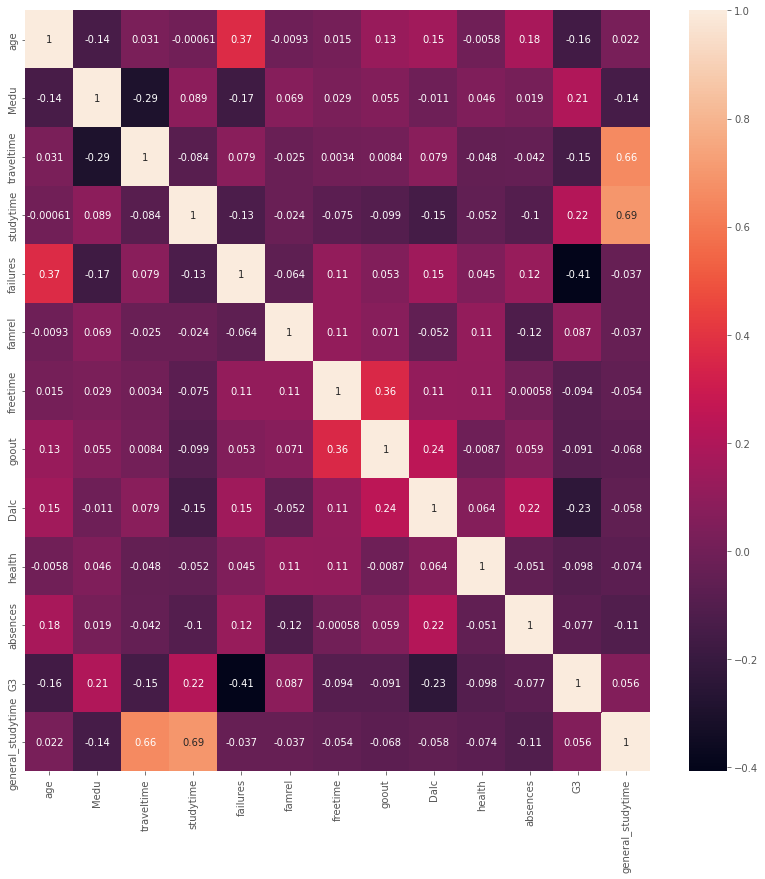

In [ ]:
# df['weekly_alc_consumption'] = df['Dalc'] + df['Walc']
df['general_studytime'] = df['studytime'] + df['traveltime']
df['rom_free'] = df['romantic'] * df['freetime']

fig, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(df.corr(method = 'pearson'), annot=True)
plt.show()

# Вам необходимо выбрать стратегию валидации и обработку данных от ошибок заполнения.

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [ ]:
# df_without_fart = df[(df['G3'] != 0) | (df['G3'] != 1)]
df_without_fart = df.copy()

In [ ]:
# Ваш код

## Разделите данные и объясните выбор стратегии

In [ ]:
# Ваш код

__Ваш ответ:__ ...

# Часть 4. Заполнение пропусков в данных 

## Фильтрация по диапазону значений 

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [ ]:
# I did it before.

## Адаптивное заполнения пропусков 

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [ ]:
print('Columns containing NaN values: ', df.columns[df.isna().any()].tolist())

Columns containing NaN values:  []


__________________________________

In [ ]:
def counting(x):
  print('Nan values: ', df[x].isna().sum())
  print(df[x].value_counts())

interact(counting, x = [i for i in df])

interactive(children=(Dropdown(description='x', options=('school', 'sex', 'age', 'address', 'famsize', 'Pstatu…

<function __main__.counting(x)>

# Вам необходимо воспользоваться наработками из предыдущих частей задания (подготовка данных, сложные признаки и стратегия валидации) для предсказания оценки (```G3```) на тестовом наборе данных.

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [ ]:
X = df.drop('G3', axis = 1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [ ]:
def optimize(algorithm, param_grid, X_train, X_test, y_train, y_test):
  algorithm = algorithm()
  SKF = StratifiedKFold(n_splits = 5) 
  grid = GridSearchCV(algorithm, param_grid, cv = SKF, scoring = 'neg_mean_squared_error', return_train_score = False, verbose = 1)

  grid_search = grid.fit(X_train, y_train)
  print(grid_search.best_params_)

  accuracy = grid_search.best_score_ # *100
  print("MSE for our training dataset with tuning is : {:.2f}".format(accuracy) )

  best_estim_model = grid.best_estimator_

  best_estim_model.fit(X, y)

  y_test_pred = best_estim_model.predict(X_test)

  test_accuracy = accuracy_score(y_test, y_test_pred) # *100
  print("MSE for our testing dataset with tuning is : {:.2f}".format(test_accuracy) )

  return best_estim_model.predict(X_train)

## KNN

In [ ]:
predictions = []

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = list(range(1, 70)))

predictions.append(optimize(KNeighborsClassifier, param_grid, X_train, X_test, y_train, y_test))

Fitting 5 folds for each of 69 candidates, totalling 345 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'n_neighbors': 40}
MSE for our training dataset with tuning is : -9.12
MSE for our testing dataset with tuning is : 0.18


## Bayes

In [ ]:
param_grid = {}
predictions.append(optimize(GaussianNB, param_grid, X_train, X_test, y_train, y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE for our training dataset with tuning is : -24.76
MSE for our testing dataset with tuning is : 0.13


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


## Регрессия

In [ ]:
param_grid = {}
optimize(LinearRegression, param_grid, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE for our training dataset with tuning is : -7.24


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


ValueError: ignored

## SVM

In [ ]:
param_grid = { "class_weight": ["balanced"],
               "kernel": ["linear", "poly"],
               "degree": np.arange(1, 10) }
predictions.append(optimize(SVC, param_grid, X_train, X_test, y_train, y_test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'class_weight': 'balanced', 'degree': 1, 'kernel': 'linear'}
MSE for our training dataset with tuning is : -11.89
MSE for our testing dataset with tuning is : 0.60


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [ ]:
#

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

In [ ]:
prediction = {}

prediction["knn"]   = predictions[0]
prediction["bayes"] = predictions[1]
prediction["svm"]   = predictions[2]

df_prediction = pd.DataFrame(prediction)
print(df_prediction.corr())

            knn     bayes      svm
knn    1.000000  0.236387  0.31506
bayes  0.236387  1.000000  0.55929
svm    0.315060  0.559290  1.00000


## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [ ]:
# Для colab notebook

# from google.colab import files

# pd.read_csv('data/sample_submission.csv', index_col='id')
# submission['G3'] = 1 # ваше предсказание
# submission.to_csv('data/submission.csv', index=False)
# files.download('data/submission.csv')

# Genetic Algorithm

In [ ]:
# !pip install tpot
# from tpot import TPOTClassifier

# tpot_clf = TPOTClassifier(generations = 100, population_size = 100, verbosity = 2, offspring_size = 100, scoring = 'accuracy', cv = 6)

# #Training and prediction

# tpot_clf.fit(X_train, y_train)
# tpot_pred = tpot_clf.score(X_test, y_test)

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.

### Подгружаем ```X_test```

In [ ]:
drive.mount('/content/gdrive/')
df_test = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Homework 1/X_test.csv')
df_train = df.copy()

df_test.drop('Fedu', inplace = True, axis = 1)
df_test.drop('Walc', inplace = True, axis = 1)

df_train.drop('general_studytime', inplace = True, axis = 1)
df_train.drop('rom_free', inplace = True, axis = 1)
df_train.drop('G3', inplace = True, axis = 1)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Закодируем категориальные признаки

In [ ]:
# school
df_test.loc[df_test['school'] == 'GP', 'school'] = 0
df_test.loc[df_test['school'] == 'MS', 'school'] = 1

# sex
df_test.loc[df_test['sex'] == 'F', 'sex'] = 0
df_test.loc[df_test['sex'] == 'M', 'sex'] = 1

# address
df_test.loc[df_test['address'] == 'U', 'address'] = 0
df_test.loc[df_test['address'] == 'R', 'address'] = 1

# famsize
df_test.loc[df_test['famsize'] == 'GT3', 'famsize'] = 0
df_test.loc[df_test['famsize'] == 'LE3', 'famsize'] = 1

# Pstatus
df_test.loc[df_test['Pstatus'] == 'T', 'Pstatus'] = 0
df_test.loc[df_test['Pstatus'] == 'A', 'Pstatus'] = 1

# Mjob
df_test.loc[df_test['Mjob'] == 'other', 'Mjob'] = 0
df_test.loc[df_test['Mjob'] == 'at_home', 'Mjob'] = 1
df_test.loc[df_test['Mjob'] == 'services', 'Mjob'] = 2
df_test.loc[df_test['Mjob'] == 'teacher', 'Mjob'] = 3
df_test.loc[df_test['Mjob'] == 'health', 'Mjob'] = 4

# Fjob
df_test.loc[df_test['Fjob'] == 'other', 'Fjob'] = 0
df_test.loc[df_test['Fjob'] == 'at_home', 'Fjob'] = 1
df_test.loc[df_test['Fjob'] == 'services', 'Fjob'] = 2
df_test.loc[df_test['Fjob'] == 'teacher', 'Fjob'] = 3
df_test.loc[df_test['Fjob'] == 'health', 'Fjob'] = 4

# reason
df_test.loc[df_test['reason'] == 'course', 'reason'] = 0
df_test.loc[df_test['reason'] == 'home', 'reason'] = 1
df_test.loc[df_test['reason'] == 'reputation', 'reason'] = 2
df_test.loc[df_test['reason'] == 'other', 'reason'] = 3

# guardian
df_test.loc[df_test['guardian'] == 'mother', 'guardian'] = 0
df_test.loc[df_test['guardian'] == 'father', 'guardian'] = 1
df_test.loc[df_test['guardian'] == 'other', 'guardian'] = 2

# schoolsup
df_test.loc[df_test['schoolsup'] == 'no', 'schoolsup'] = 0
df_test.loc[df_test['schoolsup'] == 'yes', 'schoolsup'] = 1

# famsup
df_test.loc[df_test['famsup'] == 'no', 'famsup'] = 0
df_test.loc[df_test['famsup'] == 'yes', 'famsup'] = 1

# paid
df_test.loc[df_test['paid'] == 'no', 'paid'] = 0
df_test.loc[df_test['paid'] == 'yes', 'paid'] = 1

# activities
df_test.loc[df_test['activities'] == 'no', 'activities'] = 0
df_test.loc[df_test['activities'] == 'yes', 'activities'] = 1

# nursery
df_test.loc[df_test['nursery'] == 'no', 'nursery'] = 0
df_test.loc[df_test['nursery'] == 'yes', 'nursery'] = 1

# higher
df_test.loc[df_test['higher'] == 'no', 'higher'] = 0
df_test.loc[df_test['higher'] == 'yes', 'higher'] = 1

# internet
df_test.loc[df_test['internet'] == 'no', 'internet'] = 0
df_test.loc[df_test['internet'] == 'yes', 'internet'] = 1

# romantic
df_test.loc[df_test['romantic'] == 'no', 'romantic'] = 0
df_test.loc[df_test['romantic'] == 'yes', 'romantic'] = 1

____________________________________________________________________

In [ ]:
def counting(x):
  print('Nan values: ', df_test[x].isna().sum())
  print(df_test[x].value_counts())

interact(counting, x = [i for i in df_test])

interactive(children=(Dropdown(description='x', options=('school', 'sex', 'age', 'address', 'famsize', 'Pstatu…

<function __main__.counting(x)>

In [ ]:
# Проверим, что нигде не ошиблись и ничего не забыли
df_test.columns.values.tolist() == df_train.columns.values.tolist()

True

### Создадим отдельную колонку для ```is_test``` и скомбинируем данные (дальше понадобится)

In [ ]:
df_train['is_test'] = 0
df_test['is_test'] = 1
final_dataset = pd.concat([df_train, df_test], axis = 0)

In [ ]:
adv_x_test = df_test
adv_y_test = pd.DataFrame({'is_test': [1] * len(df_test)})

adv_x_train = df_train
adv_y_train = pd.DataFrame({'is_test': [0] * len(df_train)})

In [ ]:
N = 5
cv = KFold(n_splits = N, shuffle = True)
mapping = {}

for train_index, test_index in cv.split(adv_x_train, adv_y_train):
    X_train, X_test_ = adv_x_train.iloc[train_index], adv_x_train.iloc[test_index]
    y_train, y_test_ = adv_y_train.iloc[train_index], adv_y_train.iloc[test_index]
    X_ = pd.concat([X_train, adv_x_test])
    y_ = pd.concat([y_train, adv_y_test])
    clf = SVC(gamma = 'auto', probability = True)
    clf.fit(X_, y_.values.ravel())
    res = clf.predict_proba(X_test_)
    mapping.update({index: elem for index, elem in zip(X_test_.index, res[:, 1])})

In [ ]:
indices = sorted(mapping, key = lambda x: -mapping[x])
indices = [index for index in indices if mapping[index] >= 0.5]
for index in indices:
    print(mapping[index])

0.926816803839408
0.9221353703600806
0.9029466620650082
0.8560020134166393
0.5648557544463784
0.5369868647127591


In [ ]:
X_train = adv_x_train[~adv_x_train.index.isin(indices)]
y_train = df['G3'][~df['G3'].index.isin(indices)]
X_val = adv_x_train.iloc[indices]
y_val = df['G3'].iloc[indices]

In [ ]:
pca = PCA(n_components = 10)
pca.fit(X_train)
pca.transform(X_train)
pass

In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components = 'mle', whiten = True), StandardScaler(), SVC(gamma = 'scale', C = 5))
clf.fit(X_train, y_train)
prediction = clf.predict(X_val)
print('RMSE :', sqrt(mean_squared_error(y_val, prediction)))
print('Accuracy :', accuracy_score(y_val, prediction), '👍')

RMSE : 2.0
Accuracy : 0.5 👍


# Дополнительно (ещё один способ, используя AUC curve)

### Пишем ```Classifier``` и тренируем модель

In [ ]:
dataset = final_dataset.sample(frac = 1)
av_train = dataset[:len(df_train)]
av_test = dataset[len(df_test):]

train_data = Pool(data = av_train.drop('is_test', axis = 1), label = av_train['is_test'])
remaining_data = Pool(data = av_test.drop('is_test', axis = 1), label = av_test['is_test'])

col_to_list = final_dataset.columns.tolist()
col_to_list.remove('is_test')
metrics = {
            'iterations': 500,
            'eval_metric': 'AUC'
}
model = CatBoostClassifier(**metrics)
_ = model.fit(train_data, eval_set = remaining_data, plot = True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Рисуем

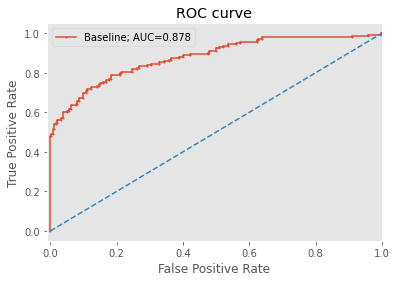

In [ ]:
y_trues = [remaining_data.get_label().astype('int')]
y_preds = [model.predict_proba(remaining_data)[:,1]]

labels = ['Baseline']
x_max = 1.0

fig, ax = plt.subplots()
for i, y_pred in enumerate(y_preds):
    y_true = y_trues[i]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker = 'o', markersize = 1)
ax.legend()
ax.grid()
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
ax.set_title('ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_xlim([-0.01, x_max])
_ = ax.set_ylabel('True Positive Rate')

### Тут ```AUC > 0.8```, что очень много и уже свидетельствует о наличии проблемы

### Смотрим самые ```важные``` признаки

##### Используя Shap

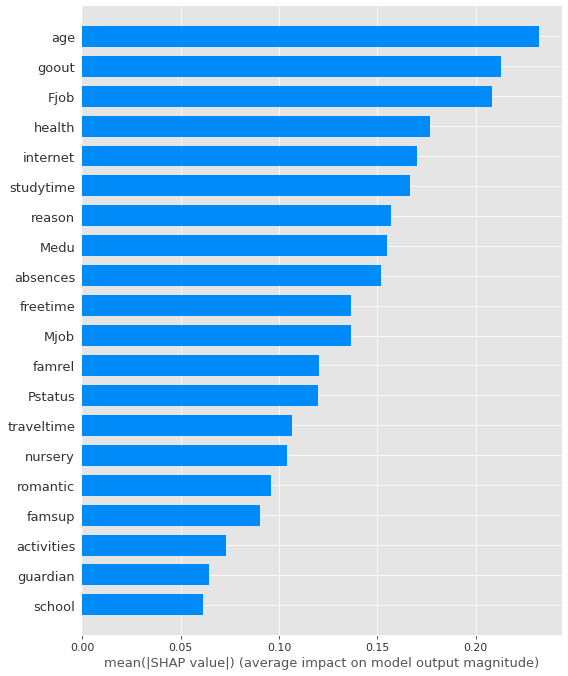

In [ ]:
columns = final_dataset.columns.tolist()

featurevalues = model.get_feature_importance(remaining_data, type = 'ShapValues')
expected_value = featurevalues[0,-1]
featurevalues = featurevalues[:,:-1]
shap.summary_plot(featurevalues, remaining_data, feature_names = columns, plot_type = 'bar')

##### Смотря на ```p-value``` и ```KS test value (Критерий согласия Колмогорова)``` для численных признаков, и ```PCS test value (Pearson's chi-squared test)``` для категориальных признаков

In [ ]:
num_cols = df_train._get_numeric_data().columns
cat_columns = list(set(df_train.columns) - set(num_cols))

In [ ]:
features_list = df_test.columns.values.tolist()
for feature in features_list:
    if feature in num_cols:
      statistic, p_value = stats.kstest(df_train[feature], df_test[feature])
      print("KS value: %.3f" %statistic, "with a p-value %.2f" %p_value, "for the feature",feature)
    else:
      _, p_value = stats.chisquare(df_train[feature])
      print("PCS p-value %.2f" %p_value, "for the feature",feature)

PCS p-value 1.00 for the feature school
PCS p-value 1.00 for the feature sex
KS value: 0.052 with a p-value 0.83 for the feature age
PCS p-value 1.00 for the feature address
PCS p-value 1.00 for the feature famsize
PCS p-value 0.96 for the feature Pstatus
KS value: 0.047 with a p-value 0.91 for the feature Medu
PCS p-value 0.00 for the feature Mjob
PCS p-value 0.00 for the feature Fjob
PCS p-value 0.04 for the feature reason
PCS p-value 0.43 for the feature guardian
KS value: 0.052 with a p-value 0.84 for the feature traveltime
KS value: 0.056 with a p-value 0.75 for the feature studytime
KS value: 0.015 with a p-value 1.00 for the feature failures
PCS p-value 0.94 for the feature schoolsup
PCS p-value 1.00 for the feature famsup
PCS p-value 0.83 for the feature paid
PCS p-value 1.00 for the feature activities
PCS p-value 1.00 for the feature nursery
PCS p-value 1.00 for the feature higher
PCS p-value 1.00 for the feature internet
PCS p-value 1.00 for the feature romantic
KS value: 0.0